
<h1 id="Assessment-Pepkor-Data-&amp;-Analytics">Assessment Pepkor Data &amp; Analytics<a class="anchor-link" href="#Assessment-Pepkor-Data-&amp;-Analytics">¶</a></h1>



<h2 id="Dylan-Johnson">Dylan Johnson<a class="anchor-link" href="#Dylan-Johnson">¶</a></h2>



<h3 id="Question-1">Question 1<a class="anchor-link" href="#Question-1">¶</a></h3><p><em>Please see attached list of birthdays for a certain company (birthdays.txt). Do the values supplied make sense? Why/why not? Are there any interesting things in the data? If so, what are they and how do you think they happened?</em></p>



<p>We start by importing the necessary Python libraries</p>


In [1]:

import calendar
import datetime
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sqlite3
import csv
%matplotlib inline



/tmp/ipykernel_18256/1689879818.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



<p>Then we load in the data and begin our investigation</p>


In [2]:

p = Path.home() / 'pepkor-test'
bdays = pd.read_csv(p / 'data' / 'birthdays.txt')
# convert date columns to date format
bdays['date of birth'] = pd.to_datetime(bdays['date of birth'].str.replace('_', '-'))
bdays['Date'] = pd.to_datetime(bdays['Date'])



In [3]:

bdays['Date'].equals(bdays['date of birth'])



True


<p>The <code>Date</code> column and <code>date of birth</code> column are equal, so we drop one</p>


In [4]:

bdays.drop(columns='Date', inplace=True)




<p>One unusual thing is that there are roughly 62 percent of people older than 65. This suggests that this is historic company data rather than more recent data.</p>


In [5]:

retirement = datetime.datetime.now().year - 65
(bdays['date of birth'].dt.year < retirement).sum() / len(bdays)



0.6806198430267659


<p>Next we check the plot of birth months. February has the fewest number of people</p>


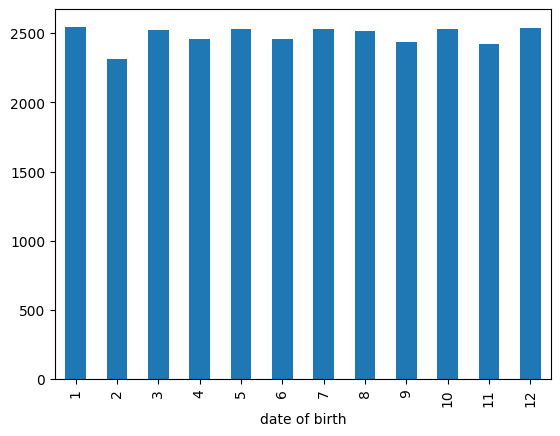

In [6]:

bdays.groupby([bdays['date of birth'].dt.month]).count()['number of people'].plot(kind='bar')
plt.show()




<p>Next we plot the birth years. Between 1910 and 1982, the number of birthdays for the year was 365, suggesting the company 
had roughly the same number of employees in that period.</p>


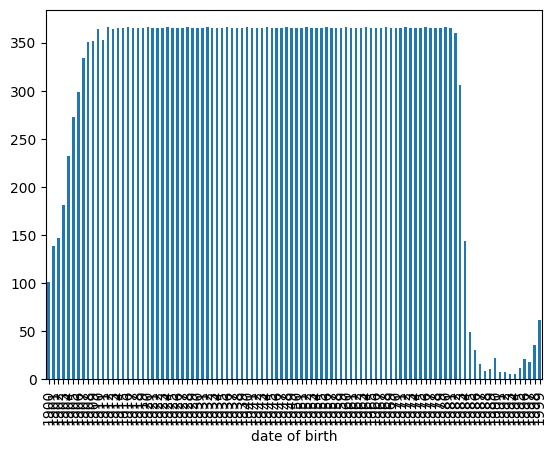

In [7]:

bdays.groupby([bdays['date of birth'].dt.year]).count()['number of people'].plot(kind='bar')
plt.show()




<p>Next we check the distribution of people with the same birthday, both with a histogram and boxplot. There is a positive skew in the distribution.</p>


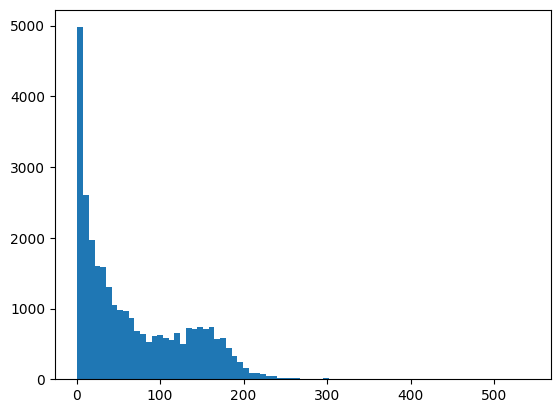

In [8]:

_, bins = np.histogram(bdays['number of people'], bins='fd')
plt.hist(bdays['number of people'], bins=bins)
plt.show()



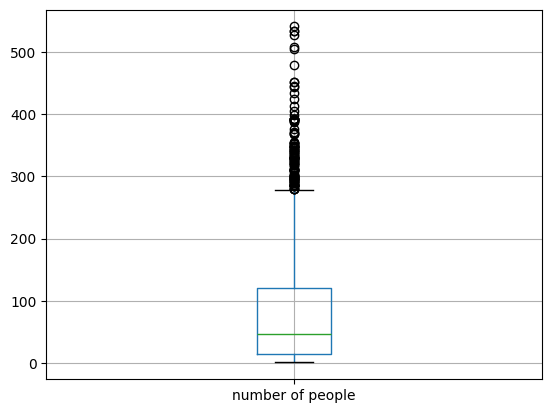

In [9]:

plt.cla(); plt.clf()
bdays.boxplot('number of people')
plt.show()




<p>An interesting thing with the outliers is that the day and month are the same in 193 of 295 (65 %) cases.</p>
<p>There may have been something wrong with the capturing of data.</p>


In [10]:

outliers = bdays[bdays['number of people'] > int(bdays.quantile(q=0.99).values[1])]
(outliers['date of birth'].dt.day == outliers['date of birth'].dt.month).sum()



193


<h2 id="Question-2">Question 2<a class="anchor-link" href="#Question-2">¶</a></h2><p><em>Say you had a very precise balance scale as in the picture below. Say you also had 8 balls that are exactly the same size and colour, except 1 of them is slightly heavier. By weighing the balls on the balance scale, how many weighs would it take to determine the heavier one?
What would be the minimum required weighs to find the heavier one? How would you guarantee that each time you did this exercise, you would only use the minimum number of weighs? Explain your reasoning.</em></p>



<p>The solution is to take two groups of 3 balls and one group of 2. On the first weigh, put 3 balls on each side. If the scale balances, the heavier ball is in the remaining group of 2. In the second weigh, put one ball on each side. You will then see the heavier ball.</p>
<p>If the scale doesn't balance after the first weigh, it means that you can 
discard the lighter group. You are now left with 3 balls. On the second weigh, put the one 
ball on each side. If the scale balances, you know it is the third ball that wasn't weighed.
Otherwise you will identify the ball.</p>



<h2 id="Question-3">Question 3<a class="anchor-link" href="#Question-3">¶</a></h2>



<p><em>This question is meant to test basic SQL skills and data manipulation. 
Please see attached tables of data (survey_data.txt and survey_keys.txt). The data represents results of a survey asking people their age, gender and education. See example below.</em></p>



<table>
<thead><tr>
<th>id</th>
<th>ageband</th>
<th>gender</th>
<th>education</th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>3</td>
<td>6</td>
<td>7</td>
<td></td>
</tr>
<tr>
<td>2</td>
<td>1</td>
<td>6</td>
<td>7</td>
<td></td>
</tr>
<tr>
<td>3</td>
<td>2</td>
<td>5</td>
<td>7</td>
<td></td>
</tr>
<tr>
<td>4</td>
<td>3</td>
<td>6</td>
<td>10</td>
<td></td>
</tr>
<tr>
<td>5</td>
<td>2</td>
<td>5</td>
<td>10</td>
<td></td>
</tr>
<tr>
<td>6</td>
<td>3</td>
<td>6</td>
<td>9</td>
<td></td>
</tr>
</tbody>
</table>



<table>
<thead><tr>
<th>lookup</th>
<th>Descr</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>20-29</td>
</tr>
<tr>
<td>2</td>
<td>30-39</td>
</tr>
<tr>
<td>3</td>
<td>40-49</td>
</tr>
<tr>
<td>4</td>
<td>50-59</td>
</tr>
<tr>
<td>5</td>
<td>male</td>
</tr>
<tr>
<td>6</td>
<td>female</td>
</tr>
</tbody>
</table>



<p><em>Write a SQL statement that produces the following summary for ageband:</em></p>
<table>
<thead><tr>
<th>ageband</th>
<th>count</th>
<th>id's</th>
</tr>
</thead>
<tbody>
<tr>
<td>20-29</td>
<td>18</td>
<td>2,11,36,42, ...</td>
</tr>
<tr>
<td>30-39</td>
<td>24</td>
<td>3,5,10,12, ...</td>
</tr>
<tr>
<td>40-49</td>
<td>26</td>
<td>1,4,6,9,13, ...</td>
</tr>
<tr>
<td>50-59</td>
<td>32</td>
<td>7,8,15,16, ...</td>
</tr>
</tbody>
</table>



<p><em>Similarly give the SQL statement for gender and education.
How would you alter your solution so that if there were many more questions, you wouldn’t have to change much?</em></p>



<p>Start by setting up a <code>sqlite</code> db in Python. The schema is defined as</p>
<div class="highlight"><pre><span></span><span class="k">CREATE</span> <span class="k">TABLE</span> <span class="k">IF</span> <span class="k">NOT</span> <span class="k">EXISTS</span> <span class="n">survey_data</span> <span class="p">(</span>
<span class="n">id</span> <span class="nb">int</span><span class="p">,</span>
<span class="n">ageband</span> <span class="nb">int</span><span class="p">,</span>
<span class="n">gender</span> <span class="nb">int</span><span class="p">,</span>
<span class="n">education</span> <span class="nb">int</span>
<span class="p">);</span>

<span class="k">CREATE</span> <span class="k">TABLE</span> <span class="k">IF</span> <span class="k">NOT</span> <span class="k">EXISTS</span> <span class="n">survey_key</span> <span class="p">(</span>
<span class="n">lookup</span> <span class="nb">int</span><span class="p">,</span>
<span class="n">descr</span> <span class="nb">text</span>
<span class="p">);</span>
</pre></div>


In [11]:

conn = sqlite3.connect('data/my.db')
c = conn.cursor()
with open(p / 'sql'/ 'sql_schema.sql') as f:
    schema = f.read()
c.executescript(schema)    
conn.commit()




<p>Then populate the tables. Define a function that will make read in the text data</p>


In [12]:

def populate_table(data: str):
    csv_reader = csv.reader(open(data), delimiter='|',skipinitialspace=True)
    next(csv_reader)
    return tuple(line for line in csv_reader)



In [13]:

to_survey_data = populate_table(p / 'data' / 'survey_data.txt')    
c.executemany('INSERT INTO survey_data VALUES (?, ?, ?, ?);', to_survey_data)



In [14]:

to_survey_key = populate_table(p / 'data' / 'survey_key.txt')
c.executemany('INSERT INTO survey_key VALUES (?, ?);', to_survey_key)
conn.commit()




<p>We check that all went as expected</p>


In [15]:

survey_data = pd.read_sql('SELECT * from survey_data limit 5', conn)
survey_key = pd.read_sql('SELECT * from survey_key limit 5', conn)
print(survey_data)
print(survey_key)



   id  ageband  gender  education
0   1        3       6          7
1   2        1       6          7
2   3        2       5          7
3   4        3       6         10
4   5        2       5         10
   lookup  descr
0       1  20-29
1       2  30-39
2       3  40-49
3       4  50-59
4       5   male



<p>To calculate the ageband summary, we use the following query</p>


In [16]:

query = """
SELECT descr as ageband, count(*), group_concat(id, ',') from
(SELECT * FROM survey_data 
LEFT JOIN survey_key ON survey_data.ageband = survey_key.lookup) 
group by ageband"""

df = pd.read_sql(query, conn)
print(df)



  ageband  count(*)                              group_concat(id, ',')
0   20-29       288  2,2,2,2,11,11,11,11,36,36,36,36,42,42,42,42,44...
1   30-39       384  3,3,3,3,5,5,5,5,10,10,10,10,12,12,12,12,19,19,...
2   40-49       416  1,1,1,1,4,4,4,4,6,6,6,6,9,9,9,9,13,13,13,13,14...
3   50-59       512  7,7,7,7,8,8,8,8,15,15,15,15,16,16,16,16,17,17,...



<p>For gender we use</p>


In [17]:

query_gender = """
SELECT descr as gender, count(*), group_concat(id, ',') from
(SELECT * FROM survey_data 
LEFT JOIN survey_key ON survey_data.gender = survey_key.lookup) 
group by gender"""
df_gender = pd.read_sql(query_gender, conn)
print(df_gender)



   gender  count(*)                              group_concat(id, ',')
0    male       736  3,3,3,3,5,5,5,5,7,7,7,7,11,11,11,11,14,14,14,1...
1  female       864  1,1,1,1,2,2,2,2,4,4,4,4,6,6,6,6,8,8,8,8,9,9,9,...



<p>And education we use</p>


In [18]:

query_education = """
SELECT descr as education, count(*), group_concat(id, ',') from
(SELECT * FROM survey_data 
LEFT JOIN survey_key ON survey_data.education = survey_key.lookup) 
group by education """
df_education = pd.read_sql(query_education, conn)
print(df_education)



   education  count(*)                              group_concat(id, ',')
0       none       368  1,1,1,1,2,2,2,2,3,3,3,3,13,13,13,13,14,14,14,1...
1    primary       384  11,11,11,11,12,12,12,12,16,16,16,16,20,20,20,2...
2  secondary       448  6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,15,15,15,15,24...
3   tertiary       400  4,4,4,4,5,5,5,5,10,10,10,10,18,18,18,18,19,19,...



<p>To generalize this query, it would be helpful to define a function that takes the column of interest as a parameter. Something such as</p>
<div class="highlight"><pre><span></span><span class="k">CREATE</span> <span class="k">FUNCTION</span> <span class="n">survey_counts</span> <span class="p">(</span><span class="o">@</span><span class="k">column</span> <span class="nb">int</span><span class="p">)</span>
<span class="k">RETURNS</span> <span class="k">TABLE</span>
<span class="k">AS</span> 
<span class="k">RETURN</span>
<span class="p">(</span>
<span class="k">SELECT</span> <span class="n">descr</span> <span class="k">as</span> <span class="o">@</span><span class="k">column</span><span class="p">,</span> <span class="k">count</span><span class="p">(</span><span class="o">*</span><span class="p">),</span> <span class="n">group_concat</span><span class="p">(</span><span class="n">id</span><span class="p">,</span> <span class="s1">','</span><span class="p">)</span> <span class="k">from</span>
<span class="p">(</span><span class="k">SELECT</span> <span class="o">*</span> <span class="k">FROM</span> <span class="n">survey_data</span> 
<span class="k">LEFT</span> <span class="k">JOIN</span> <span class="n">survey_key</span> <span class="k">ON</span> <span class="n">survey_data</span><span class="p">.</span><span class="o">@</span><span class="k">column</span> <span class="o">=</span> <span class="n">survey_key</span><span class="p">.</span><span class="n">lookup</span><span class="p">)</span> 
<span class="k">group</span> <span class="k">by</span> <span class="o">@</span><span class="k">column</span><span class="p">)</span>
</pre></div>



<h2 id="Question-4">Question 4<a class="anchor-link" href="#Question-4">¶</a></h2>



<p><em>Write a python function that take in an input, a year, and outputs whether the year is a leap year.
e.g.</em></p>
<div class="highlight"><pre><span></span><span class="o">&gt;&gt;</span> <span class="k">def</span> <span class="nf">is_leap_year</span><span class="p">(</span><span class="n">year</span><span class="p">):</span>
    <span class="c1">#some processing</span>

<span class="o">&gt;&gt;</span> <span class="n">is_leap_year</span><span class="p">(</span><span class="mi">1900</span><span class="p">)</span>
<span class="o">&gt;&gt;</span> <span class="bp">False</span>
</pre></div>
<p><em>A leap year is defined by 3 criteria:</em></p>
<ul>
<li>The year can be evenly divided by 4, is a leap year, unless: </li>
<li>The year can be evenly divided by 100, it is NOT a leap year, unless:</li>
<li>The year is also evenly divisible by 400. Then it is a leap year.</li>
</ul>
<p><em>What tests would you perform when evaluating your function?</em></p>


In [19]:

def is_leap_year(year: int):
    assert isinstance(year, int) or isinstance(year, float), 'Must be numeric'
    if year % 4 != 0:
        return False
    elif year % 100 !=0:
        return True
    elif year % 400 !=0:
        return False
    else:
        return True




<p>The major test would be comparing my function with the built in function in the <code>calendar</code> library</p>


In [20]:

for year in range(1500, 2000):
    if not (calendar.isleap(year) == is_leap_year(year)):
        raise Exception('Disagreement for year {year}')




<h2 id="Question-5">Question 5<a class="anchor-link" href="#Question-5">¶</a></h2>



<p><em>Validation of South African ID numbers is a very important task. The check can be found here <a href="https://www.westerncape.gov.za/general-publication/decoding-your-south-african-id-number-0">https://www.westerncape.gov.za/general-publication/decoding-your-south-african-id-number-0</a> . Write a SQL statement that does the various checks OR write a Python function that does the required checks. You may use the number in the above website to check.
What do you think would be the possible advantages/disadvantages of using your chosen language over the other?
How would you check for a passport number?</em></p>



<p>we define a function that checks</p>
<ul>
<li>the length of the input is 13 digits</li>
<li>That the first 6 digits are a valid date</li>
<li>That the 11th digit is either 0 or 1</li>
<li>that the 12th digit is an 8</li>
<li>that the 13th digit is calculated by Luhn's Algorithm</li>
</ul>


In [21]:

def sa_id(id_number: int):
    str_id = str(id_number)
    assert len(str_id) == 13, 'ID is incorrect number of digits'
    # Check that date is valid. datetime constructor will throw an error if invalid
    datetime.datetime(int(str_id[:2]), int(str_id[2:4]), int(str_id[4:6]))
    # Check citizenship
    assert str_id[10] == '0' or str_id[10] == '1', 'Invalid Citizenship Code'
    # Check for the number 8
    assert str_id[11] == '8', '12th digit must be 8'
    # Checksum using Luhn's algorithm
    # Extract digis 
    digits = [int(d) for d in str_id]
    odd_digits = digits[-1::-2]
    even_digits = digits[-2::-2]
    checksum = 0
    checksum += sum(odd_digits)
    for d in even_digits:
        # Double each digit and add the digits of the result
        checksum += sum([int(i) for i in str(d*2)])
    return checksum % 10 == 0




<p>We check this with a few sample ID numbers</p>


In [22]:

id_list = [8306045800086, 8306044800087, 7302015800082]
for id_no in id_list:
    print(sa_id(id_no))

sa_id(7302015800682)



True
True
True


AssertionError: Invalid Citizenship Code


<p>For passport validation, the numbering format is a letter followed by a 8 digits (<a href="http://www.e4.co.za/downloads/passport.pdf">http://www.e4.co.za/downloads/passport.pdf</a>).</p>


In [ ]:

def sa_passport(id_number: str):
    str_id = str(id_number)
    assert len(str_id) == 9, 'Passport number must be 9 digits'
    assert not str_id[0].isdigit(), 'First element must be a character'
    # Check that the remaining 8 elements are numbers
    assert str_id[1:].isdigit(), 'The remaining 8 elements must be digits'
    return True




<p>Using Python would make the code for validating the ID numbers more readable. Whereas SQL syntax would be longer, but better for large scale validation.</p>
